<a href="https://colab.research.google.com/github/BallderJ/upsrj-machine-learning/blob/main/Linear_Regression_Pipeline_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PREPARACION DEL ENTORNO
Importamos las librerias necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Generación del CSV

Caso: Años de Experiencia vs Salario
* Generaremos un dataset de 100 personas donde el salario depende linealmente de los años de experiencia, agregando un poco de ruido para que sea realista.

In [5]:
# Configurar semilla para reproducibilidad
np.random.seed(42)

# Generar 100 datos de años de experiencia (0 a 20 años)
years_experience = np.random.rand(100, 1) * 20

# Definir relación lineal: Salario = 30,000 + (5,000 * experiencia) + ruido
salary = 30000 + (5000 * years_experience) + (np.random.randn(100, 1) * 7000)

# Crear DataFrame y guardar en CSV
df = pd.DataFrame(data=np.hstack([years_experience, salary]),
                  columns=['YearsExperience', 'Salary'])

df.to_csv('salary_data.csv', index=False)
print("Archivo 'salary_data.csv' generado con éxito.")

# Mostrar las primeras filas
df.head()


Archivo 'salary_data.csv' generado con éxito.


,YearsExperience,Salary
0,7.490802,68063.341362
1,19.014286,122978.379188
2,14.639879,103841.719617
3,11.973170,75952.866017
4,3.120373,44064.160829


#Creacion del Pipeline y Entrenamiento
Dividiremos los datos, escalaremos y aplicaremos la regresion linal dentro de un Pipeline

In [6]:
# Definimos las variables a partir del DataFrame
X = df[['YearsExperience']]
y = df['Salary']

def plot_model(xlabel: str, ylabel: str, tittle: str):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, label="Datos reales (Salarios)", alpha=0.7)
    plt.plot(X, y_pred, color="red", label="Modelo lineal (Pipeline)", linewidth=2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(tittle)
    plt.grid(True)
    plt.legend()
    plt.show()


#PIPELINE DE REGRESIÓN LINEAL

In [7]:
# Definicion del pipeline: Escalado + Regresión
pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
])

# Entrenamiento del modelo
pipeline.fit(X, y)

# Prediccion del modelo
y_pred = pipeline.predict(X)

#RESULTADOS Y GRAFICA

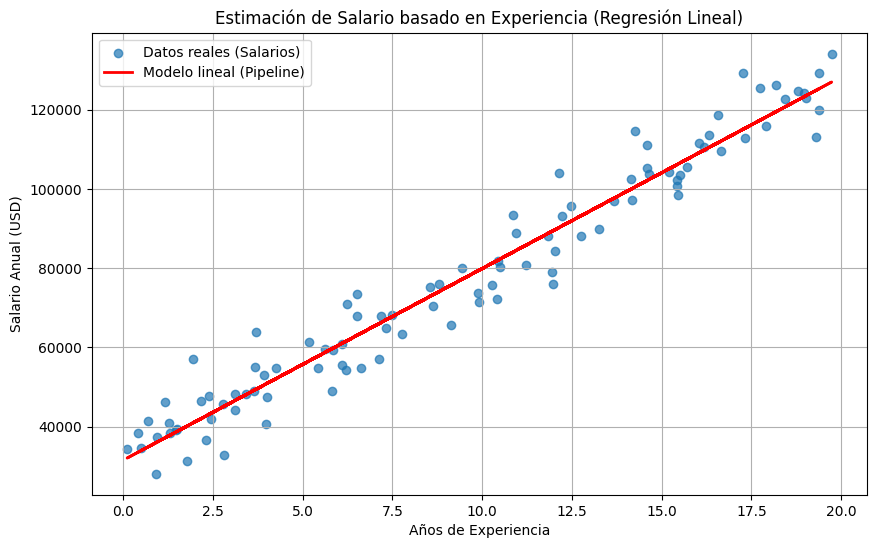

R2 Score: 0.9541
Error Cuadrático Medio: 39522643.63


In [8]:
# Llamada a la función de graficación con tus parámetros
plot_model(
    xlabel="Años de Experiencia",
    ylabel="Salario Anual (USD)",
    tittle="Estimación de Salario basado en Experiencia (Regresión Lineal)"
)

# Mostrar métricas para verificar el rendimiento
print(f"R2 Score: {r2_score(y, y_pred):.4f}")
print(f"Error Cuadrático Medio: {mean_squared_error(y, y_pred):.2f}")